<table style="width:98%">
  <tr style="background-color:#FFFFFF">
    <td width ="59%">
        <h1 style="font-size:3vw;color:#A00000;text-align:center">
        Autonomous Soil Exploration System using Artificial Curiosity
        </h1>
        <h1 style="font-size:2vw;color:#A00000;text-align:center">
        <font style="font-family:Snell Roundhand, cursive;color:darkgreen">
            Neural Network using gradient descent.
        </font>
        </h1>
        <h1 style="font-size:1.2vw;color:#A00000;text-align:center">
        Prof. Goren Gordon, Philippe Artsztein
        </h1>
    </td>
    <td width ="39%"><img src="./MyLogo.jpg" width="100%" height="100%" style="float:left;vertical-align:bottom;margin: 20px 20px"></td>
  </tr>
</table>

<div class="alert alert-danger">Red backgroung - General descriptions and explanations.</div>

<div class="alert alert-info">Blue background - Descriptions and explanations to understand the flow of the code.</div>

<div class="alert alert-success">Green background - Descriptions, explanations and usage of functions or classes.</div>

In [1]:
# External Packeges
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.labelcolor': 'darkgreen', 'axes.facecolor': 'lavender'})
sns.set_color_codes()

# disable printing annoying warnings of distplot :(
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Visualization of a 2D Neural Network display
import Draw_Neural_Network_Schaeme as DrawNN

<div class="alert alert-danger">
Here we present a modular Neural Network using Gradient Descent from scratch in Python.<br>
</div>

<div class="pagebreak"> </div>

<div class="alert alert-danger">
<u><b>Neural Network using Gradient Descent.</b></u><br>
Gradient descent is an optimization algorithm that follows the negative gradient of an objective function in order to locate the minimum of the function.<br>
Gradient descent is commonly-used to train machine learning models and neural networks.<br>
The process of training data helps these models learn over time, and the cost function within gradient descent specifically acts as a barometer, gauging its accuracy with each iteration of parameter updates.<br>
Until the function is close to or equal to zero, the model will continue to adjust its parameters to yield the smallest possible error.<br>
This cod is based on Omar Aflak code. For more information look at:
<a href="https://www.kaggle.com/code/milan400/neural-network-from-scratch-numpy-pandas">Omar Aflak code</a><br>
</div>

<div class="alert alert-success">
<b><u>class Layer</u></b><br>
Layer object is an abstract parent class, which will serve two types of child class operation: weight/bias and activation.<br>
The class is handling simple properties which are an input, an output.<br><br>
<b><u>Constructor Input</u></b><br>
&emsp;<u><i>Nothing</i></u><br><br>
<b><u>Methods</u></b><br>
&emsp;<b>ForwardPropagation Forward_Propagation(</b>...<b>)</b><br>
&emsp;&emsp;Note: The <i><b>raise NotImplementedError</b></i> used to indicate a TODO for the child class<br>
&emsp;<b>BackwardPropagation(</b>...<b>)</b><br>
&emsp;&emsp;Note: The <i><b>raise NotImplementedError</b></i> used to indicate a TODO for the child class<br>
&emsp;&emsp;Here we use the learning_rate which is a hyper-parameter that controls how much<br> &emsp;&emsp;we are adjusting the weights of our network with respect the loss gradient.<br>
&emsp;&emsp;Note: maybe I will update the learning_rate to an adaptive learning_rate.
</div>

In [2]:
class Layer:
    def __init__(self):
        self.input = None
        self.output= None

    # computes the output Y of a layer for a given input X
    def ForwardPropagation(self, input_data):
        raise NotImplementedError

    # computes dE/dX for a given dE/dY (and update parameters if any)
    def BackwardPropagation(self, output_error, learning_rate):
        raise NotImplementedError

<div class="alert alert-success">
<b><u>class FullyConnectedLayer</u></b><br>
FullyConnectedLayer object is a child class inherit from parent abstract class Layer<br>
The class holds weights and bias of the neurons layer to the folowing neurons layer.<br>
<br><b><u>Constructor Input</u></b><br>
&emsp;<u><i>input_size</i></u><br>
&emsp;&emsp;number of input neurons.<br>
&emsp;<u><i>output_size</i></u><br>
&emsp;&emsp;number of output neurons.<br>
&emsp;The constructor creates biases and weights for the network, and initialized<br>
&emsp;them randomly, with values between -0.5 to 0.5<br> 
<br><b><u>Methods</u></b><br>
&emsp;<b>ForwardPropagation(</b>...<b>)</b><br>
&emsp;&emsp;As the name suggests, the input data is fed in the forward direction through the network.<br>
&emsp;&emsp;Each hidden layer accepts the input data, processes it as per the activation function and passes<br>
&emsp;&emsp;to the successive layer.<br>
&emsp;&emsp;Practically it calculate the output Y of a layer for a given input X<br>
&emsp;&emsp;&emsp;Y(j)= B(j) + SUM {X(i)*W(i,j)}<br>
&emsp;&emsp;the method returns output for a given input<br>
&emsp;<b>BackwardPropagation(</b>...<b>)</b><br>
&emsp;&emsp;The algorithm is used to effectively train a neural network through a method called chain rule.<br>
&emsp;&emsp;In simple terms, after each forward pass through a network, backpropagation performs a backward<br>
&emsp;&emsp;Practically it calculate ∂E/∂W, ∂E/∂B for a given output_error=∂E/∂Y.<br>
&emsp;&emsp;returns input_error=∂E/∂X<br>
&emsp;&emsp;computes ∂E/∂W, ∂E/∂B for a given output_error=∂E/∂X.<br>
&emsp;&emsp;&emsp;∂E/∂X= ∂E/∂Y * Transposed(W)<br>
&emsp;&emsp;&emsp;∂E/∂W= Transposed(X) * ∂E/∂Y<br>
&emsp;&emsp;&emsp;∂E/∂B= ∂E/∂Y<br>
</div>

In [3]:
class FullyConnectedLayer(Layer):
    def __init__(self, input_size, output_size):
        self.weights= np.random.rand(input_size, output_size) - 0.5
        self.bias   = np.random.rand(1, output_size) - 0.5
        self.Name   = "Fully Connected Layer"

    def ForwardPropagation(self, input_data):
        self.input = input_data
        self.output= np.dot(self.input, self.weights) + self.bias
        return(self.output)

    def BackwardPropagation(self, output_error, learning_rate):
        input_error  = np.dot(output_error, self.weights.T)
        weights_error= np.dot(self.input.T, output_error)
        self.weights = self.weights - (learning_rate * weights_error)
        self.bias    = self.bias    - (learning_rate * output_error)
        return(input_error)

<div class="alert alert-success">
<b><u>class ActivationFunctionToUse(Layer)</u></b><br>
ActivationFunctionToUse object is a child class inherit from parent abstract class Layer. The class stors<br>
the Activation function and its prime (derivative).<br>
The purpose of this class is to add non-linearity to the model by applying non-linear functions<br>
to the output of some layers. Activation is responsible for adding non-linearity to the output of a<br>
neural network model. Without an activation function, a neural network is simply a linear regression.<br>
<br><b><u>Constructor Input</u></b><br>
&emsp;<u><i>activation</i></u><br>
&emsp;&emsp;Name of activation function to be use for this layer.<br>
&emsp;<u><i>activation_prime</i></u><br>
&emsp;&emsp;Name of activation prime function to be use for this layer.<br>
<br><b><u>Methods</u></b><br>
&emsp;<b>ForwardPropagation(</b>...<b>)</b><br>
&emsp;&emsp;for a given input X, the output is simply the activation function applied to every
element of X.<br> 
&emsp;&emsp;Which means input and output have the same dimensions.<br>
&emsp;&emsp;&emsp;Y= [f(x_1) ... f(x_i)] = f(X)<br>
&emsp;&emsp;the method returns the activated input<br>
<br>&emsp;<b>BackwardPropagation(</b>...<b>)</b><br>
&emsp;&emsp;for a given ∂E/∂Y, we want to calculate ∂E/∂X.<br>
&emsp;&emsp;&emsp;∂E/∂X= [∂E/∂x_1 ... ∂E/∂x_i]<br>
&emsp;&emsp;using thr chain rule :<br>
&emsp;&emsp;&emsp; &emsp; &emsp;= [∂E/∂y_1*∂y_1/∂x_1 ... ∂E/∂y_i*∂y_i/∂x_i]<br>
&emsp;&emsp;by defenition : ∂y/∂x = f'(x) so :<br>
&emsp;&emsp;&emsp; &emsp; &emsp;= [∂E/∂y_1*f'(x_1) ... ∂E/∂y_i*f'(x_i)]<br>
&emsp;&emsp;&emsp; &emsp; &emsp;= [∂E/∂y_1 ... ∂E/∂y_i] o [f'(x_1) ... f'(x_i)]<br>
&emsp;&emsp;&emsp; &emsp; &emsp;= ∂E/∂Y o f'(X)<br>
&emsp;&emsp;Be careful, here we are using an element-wise multiplication (o) between the two<br>
&emsp;&emsp;matrices (whereas in the formulas above, it was a dot product).<br>
&emsp;&emsp;Returns input_error= dE/dX for a given output_error= dE/dY.<br>
&emsp;&emsp;learning_rate is not used because there is no "learnable" parameters.<br>
</div>

In [4]:
class ActivationFunctionToUse(Layer):
    def __init__(self, activation, activation_prime):
        self.activation      = activation
        self.activation_prime= activation_prime
        self.Name            = "Activation Layer"

    def ForwardPropagation(self, input_data):
        self.input = input_data
        self.output= self.activation(self.input)
        return(self.output)

    def BackwardPropagation(self, output_error, learning_rate):
        return(self.activation_prime(self.input) * output_error)

<div class="alert alert-success">
<b>Sigmoid(</b>z<b>)</b><br>
The Sigmoid function is possible function that can be used as a non-linear activation function between layers<br>
of a neural network. Sigmoid function map input values between 0 and 1.<br>
&emsp;<u>Input</u><br>
&emsp;&emsp;<u><i>z</i></u><br>
&emsp;&emsp;&emsp;Is the input (w_1⋅x_1+w_2⋅x_2+...+w_i⋅x_i+b) of variable we want to optimize.<br>
<b>SigmoidPrime(</b>z<b>)</b><br>
SigmoidPrime is the derivative of Sigmoid Function. An interesting properties of the Sigmoid function<br>
is that the derivative of Sigmoid can be expressed in terms of the function itself.<br>
&emsp;<u>Input</u><br>
&emsp;&emsp;<u><i>z</i></u><br>
&emsp;&emsp;&emsp;Is the input (w_1⋅x_1+w_2⋅x_2+...+w_i⋅x_i+b) of variable we want to optimize.<br><br>
<b>Tanh(</b>z<b>)</b><br>
The tanh (hyperbolic tangent) function is another possible function that can be used as a non-linear<br>
activation function between layers of a neural network. It shares a few things in common with the sigmoid<br>
activation function. Unlike a sigmoid function that will map input values between 0 and 1, the Tanh will map<br>
values between -1 and 1.<br>
&emsp;<u>Input</u><br>
&emsp;&emsp;<u><i>z</i></u><br>
&emsp;&emsp;&emsp;Is the input (w_1⋅x_1+w_2⋅x_2+...+w_i⋅x_i+b) of variable we want to rescale.<br>
<b>TanhPrime(</b>z<b>)</b><br>
TanhPrime is the derivative of Tanh Function. Similar to the sigmoid function, one of the interesting properties<br>
of the tanh function is that the derivative of tanh can be expressed in terms of the function itself.<br> 
&emsp;<u>Input</u><br>
&emsp;&emsp;<u><i>z</i></u><br>
&emsp;&emsp;&emsp;Is the input (w_1⋅x_1+w_2⋅x_2+...+w_i⋅x_i+b) of variable we want to rescale.<br><br>
<b>Relu(</b>z<b>)</b><br>
Relu is an activation function. Relu is another possible function that can be used as a non-linear<br>
The formula is deceptively simple: max(0,z). Despite its name, Rectified Linear Units, it’s not linear and<br>
provides the same benefits as Sigmoid but with better performance.<br>
&emsp;<u>Input</u><br>
&emsp;&emsp;<u><i>z</i></u><br>
&emsp;&emsp;&emsp;Is the input (w_1⋅x_1+w_2⋅x_2+...+w_i⋅x_i+b) of variable we want to rescale.<br>
<b>ReluPrime(</b>z<b>)</b><br>
ReluPrime is the derivative of Relu Function.<br>
&emsp;<u>Input</u><br>
&emsp;&emsp;<u><i>z</i></u><br>
&emsp;&emsp;&emsp;Is the input (w_1⋅x_1+w_2⋅x_2+...+w_i⋅x_i+b) of variable we want to optimize.<br>
</div>

In [5]:
def Sigmoid(z):
    return(1.0/(1.0+np.exp(-z)))
# Derivative of the sigmoid function.
def SigmoidPrime(z):
    return(Sigmoid(z)*(1-Sigmoid(z)))

def Tanh(z):
    return(np.tanh(z))
def TanhPrime(z):
    return(1-np.tanh(z)**2)

def Relu(z):
    return(np.maximum(0,z))
def ReluPrime(z):
    return(np.heaviside(z,0))

<div class="alert alert-info">
Showing non-linear activation functions and its prime (derivative).
</div>

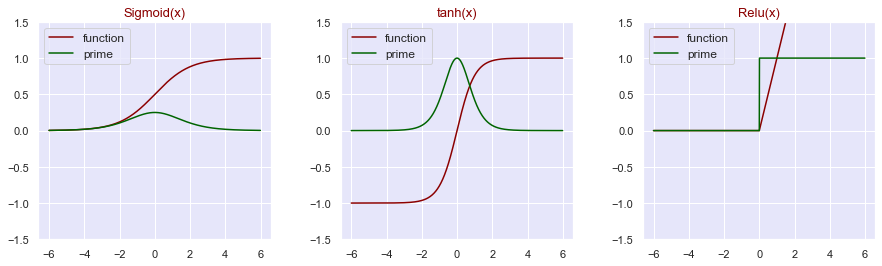

In [6]:
x= np.arange(-6,6,0.01)
fig, axes = plt.subplots(1,3, figsize=(15, 4))
plt.subplots_adjust(wspace= 0.3)
sns.axes_style(rc={'axes.facecolor': 'lavender'})

sns.lineplot(x=x, y=Sigmoid(x), ax=axes[0], color="darkred")
sns.lineplot(x=x, y=SigmoidPrime(x), ax=axes[0], color="darkgreen") 
axes[0].set_ylim(-1.5, 1.5)
axes[0].set_title("Sigmoid(x)", fontsize=13, color="darkred")
axes[0].legend(["function", "prime"], loc='upper left', fontsize=12)

sns.lineplot(x=x, y=Tanh(x), ax=axes[1], color="darkred") 
sns.lineplot(x=x, y=TanhPrime(x), ax=axes[1], color="darkgreen")
axes[1].set_ylim(-1.5, 1.5)
axes[1].set_title("tanh(x)", fontsize=13, color="darkred")
axes[1].legend(["function", "prime"], loc='upper left', fontsize=12)

sns.lineplot(x=x, y=Relu(x), ax=axes[2], color="darkred") 
sns.lineplot(x=x, y=ReluPrime(x), ax=axes[2], color="darkgreen")
axes[2].set_ylim(-1.5, 1.5)
axes[2].set_title("Relu(x)", fontsize=13, color="darkred")
axes[2].legend(["function", "prime"], loc='upper left', fontsize=12)

plt.show()

<div class="alert alert-success">
<b><u>MEAN SQUARE ERROR / QUADRATIC LOSS / L2 LOSS</u></b><br>
Mse (Mean Square Error) loss function define as the average of squared differences between
the actual<br>
and the predicted value. It’s the most commonly used regression loss function. The corresponding cost<br>
function is the mean of these squared errors (Mse). The Mse loss function penalizes the model for making<br>
large errors by squaring them and this property makes the Mse cost function less robust to outliers.<br>
<br><b>Mse(</b>y_pred,y_true<b>)</b><br>
Mse is the loss function<br>
&emsp;<u>Input</u><br>
&emsp;&emsp;<u><i>y_pred</i></u><br>
&emsp;&emsp;&emsp;Is the output prediction vector.<br>
&emsp;&emsp;<u><i>y_true</i></u><br>
&emsp;&emsp;&emsp;Is the real output vector.<br>
<br><b>MsePrime(</b>y_pred,y_true<b>)</b><br>
MsePrime is the derivative of the loss function<br>
&emsp;<u>Input</u><br>
&emsp;&emsp;<u><i>y_pred</i></u><br>
&emsp;&emsp;&emsp;Is the output prediction vector.<br>
&emsp;&emsp;<u><i>y_true</i></u><br>
&emsp;&emsp;&emsp;Is the real output vector.<br>
</div>

In [7]:
def Mse(y_pred,y_true):
    return(np.mean(np.power(y_pred-y_true, 2)));

def MsePrime(y_pred,y_true):
    return(2.0*(y_pred-y_true)/y_true.size);

<div class="alert alert-success">
<b><u>Class Network</u></b><br>
Network is a class. Network implement the gradient descent learning algorithm for a feedforward neural network.<br>
Gradients are calculated using backpropagation. This code is simple, easily readable, and easily modifiable.<br>
It is not optimized, and omits many desirable features.<br>
<br><b><u>Constructor Input</u></b><br>
&emsp;<u><i>Nothing</i></u><br>
<br><b><u>Methods</u></b><br>
&emsp;<b>AddLayer(</b>layer<b>)</b><br>
&emsp;&emsp;For every layer the <i>Add</i> function must be called twice.<br>
&emsp;&emsp;First, to initialize the weights and biases.<br>
&emsp;&emsp;Second, to determine the activation method.<br>
&emsp;&emsp;so first :<br> 
&emsp;&emsp;&emsp;AddLayer(FullyConnectedLayer(input_size, output_size))<br>
&emsp;&emsp;follows by :<br>
&emsp;&emsp;&emsp;AddLayer(ActivationFunctionToUse(activation, activation_prime))<br>
&emsp;&emsp;Where 'input_size' is the number of neurons in the layer, 'output_size' is the number of neurons<br>
&emsp;&emsp;in the following layer.<br>
&emsp;&emsp;'activation' is the name of thre Activation function, 'activation_prime' is the name of the prime (derivative)<br>
&emsp;&emsp;of Activation function.<br><br>
&emsp;<b>LossFunctionToUse(</b>loss, loss_prime<b>)</b><br>
&emsp;&emsp;Define the loss function names use in fitting process.<br>
&emsp;<u>Input</u><br>
&emsp;&emsp;<u><i>loss</i></u><br>
&emsp;&emsp;&emsp;Is the loss function name.<br>
&emsp;&emsp;<u><i>loss_prime</i></u><br>
&emsp;&emsp;&emsp;Is the derivative of the loss function name.<br><br>
&emsp;<b>PrintLayers()</b><br>
&emsp;&emsp;Prints model data, for every layers its variables:<br>
&emsp;&emsp;&emsp;if type of layer is 'Fully Connected Layer':<br>
&emsp;&emsp;&emsp;&emsp;then it is follows by bias vector and the weights matrix.<br> 
&emsp;&emsp;&emsp;if type of layer is 'Activation Layer':<br>
&emsp;&emsp;&emsp;&emsp;then it is follows by Activation function name and Activation function prime name.<br>
&emsp;&emsp;Then prints the Loss function name and Loss function prime name<br><br>
&emsp;<b>Predict(</b>input_data<b>)</b><br>
&emsp;&emsp;Return the Prediction of the fitting process.<br>
&emsp;<u>Input</u><br>
&emsp;&emsp;<u><i>input_data</i></u><br>
&emsp;&emsp;&emsp;Is the feature vector or vectors.<br>
&emsp;The input function is a ndarray categorical vector or vectors.<br>
&emsp;Note: Do not forget to reduce the output dimantion use, Look at this example:<br>
<font color="peru">
&emsp;&emsp;net= Network()<br>
&emsp;&emsp;...<br>
&emsp;&emsp;Fit(...)<br>
&emsp;&emsp;...<br>
&emsp;&emsp;X= np.expand_dims(X, axis=1)<br>
&emsp;&emsp;Y= net.Predict(X)<br>
</font>
&emsp;The function return an ndarray categorical prediction.<br>
&emsp;Note: Do not forget to reduce the output dimantion use, Look at this example:<br>
<font color="peru">
&emsp;&emsp;net= Network()<br>
&emsp;&emsp;...<br>
&emsp;&emsp;Fit(...)<br>
&emsp;&emsp;...<br>
&emsp;&emsp;Y= net.Predict(X)<br>
&emsp;&emsp;np.squeeze(Y, axis=1)<br><br>
</font>
&emsp;<b>Fit( </b>x_train, y_train, Epochs,<br> 
&emsp;&emsp;&emsp;Learning_Rate=0.1, Learning_Rate_Decay=0, Decay_Method="None",<br>
&emsp;&emsp;&emsp;Validation_Mode=False,_validation=None, y_validation=None,<br>
&emsp;&emsp;&emsp;Silent_Mode=True<b> )</b><br>
&emsp;&emsp;Return the Prediction of the fitting process.<br>
&emsp;<u>Input</u><br>
&emsp;&emsp;<u><i>x_train, y_train</i></u><br>
&emsp;&emsp;&emsp;Training data, x_train is input features and y_train is categorical output.<br>
&emsp;&emsp;<u><i>Epochs</i></u><br>
&emsp;&emsp;&emsp;The number times all training data is been implemented by gradient descent learning algorithm.<br>
&emsp;&emsp;<u><i>Learning_Rate</i></u><br>
&emsp;&emsp;&emsp;is a hyper-parameter that controls how much we are adjusting the weights of our network<br>
&emsp;&emsp;&emsp;with respect the loss gradient. This float number should be greater then 0 and less and equal to 1.<br>
&emsp;&emsp;&emsp;In most cases, 0.1 should be a starting value.<br>
&emsp;&emsp;<u><i>Learning_Rate_Decay</i></u><br>
&emsp;&emsp;&emsp;is a hyper-parameter that controls how much we are decaying Learning_Rate  after each epoch<br>
&emsp;&emsp;&emsp;passes through the training set. This float number should be greater then 0 and less and equal to 1.<br>
&emsp;&emsp;<u><i>Decay_Method</i></u><br>
&emsp;&emsp;&emsp;Can be one of these three decay method type:<br>
&emsp;&emsp;&emsp;"None" - the Learning_Rate is constant and do not change afrer each epoch.<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;No need to provide Learning_Rate_Decay<br>
&emsp;&emsp;&emsp;"Common_Decay" - the Learning_Rate follow this equation:<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Learning_Rate= Learning_Rate/(1+Learning_Rate_Decay*epoch_num)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Learning_Rate_Decay should be about 10% initial Learning_Rate<br>
&emsp;&emsp;&emsp;"Exponential_Decay" - the Learning_Rate follow this equation:<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Learning_Rate= Learning_Rate(Learning_Rate_Decay^epoch_num)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Learning_Rate_Decay should be around 0.95<br>
&emsp;&emsp;<u><i>Validation_Mode</i></u><br>
&emsp;&emsp;&emsp;If <i>Validation_Mode</i> is set to True, the fitting process uses additional claster of<br>
&emsp;&emsp;&emsp;datasets named validation, to quantify the relative fit of the model.<br> &emsp;&emsp;&emsp;If <i>Validation_Mode</i> is set to False, the fitting process do not use any additional DataSet.<br>
&emsp;&emsp;<u><i>x_validation, y_validation</i></u><br>
&emsp;&emsp;&emsp;'x_validation' is input features and y_validation is categorical output.<br>
&emsp;&emsp;<u><i>Silent_Mode</i></u><br>
&emsp;&emsp;&emsp;If <i>Silent_Mode</i> is set to False, the fitting process prints while processing relevant information.<br>
&emsp;&emsp;&emsp;If <i>Silent_Mode</i> is set to True, the fitting process do not prints any information.<br>
&emsp;<br><b>Save(</b>TheFileName, Silent_Mode=False<b>)</b><br>
&emsp;&emsp;Saves the model data as a txt ascii notation to local hard disk.<br>
&emsp;<u>Input</u><br>
&emsp;&emsp;<u><i>TheFileName</i></u><br>
&emsp;&emsp;&emsp;The name of file name where model data is saved.<br>
&emsp;&emsp;<u><i>Silent_Mode</i></u><br>
&emsp;&emsp;&emsp;If <i>Silent_Mode</i> is set to False, in addition to saving to a file, relevant information is also displayed.<br>
&emsp;&emsp;&emsp;If <i>Silent_Mode</i> is set to True, non relevant information is displayed.<br>
</div>

In [8]:
class Network:
    def __init__(self):
        self.layers    = []
        self.loss_Name = "Loss Function"
        self.loss      = None
        self.loss_prime= None

    # add layer to network
    def AddLayer(self, layer):
        self.layers.append(layer)

    # set loss to use
    def LossFunctionToUse(self, loss, loss_prime):
        self.loss      = loss
        self.loss_prime= loss_prime

    def PrintLayers(self):
        for layer in self.layers:
            if(layer.Name=="Fully Connected Layer"):
                print("\n====",layer.Name)
                print(layer.bias)
                print(layer.weights)
            if(layer.Name=="Activation Layer"):
                print("====",layer.Name)
                print(layer.activation.__name__)
                print(layer.activation_prime.__name__)
        print("\n====",net2.loss_Name)
        print(net2.loss.__name__)
        print(net2.loss_prime.__name__)
        
    # predict output for given input
    def Predict(self, input_data):
        # sample dimension first
        samples= len(input_data)
        result = []
        # run network over all samples
        for iii in range(samples):
            # forward propagation
            output= input_data[iii]
            for layer in self.layers:
                output= layer.ForwardPropagation(output)
            result.append(output)
        return result

    def Acurancy(YY_True, YY_Prediction):
        TotolHits= 0
        TotalSets= YY_True.shape[0]
        for iii in range(TotalSets):
            if(np.argmax(YY_True[iii])==np.argmax(YY_Prediction[iii])):
                TotolHits+= 1
        return(TotolHits/TotalSets*100)

    def LearningDecay(self, Epoch_Number, Learning_Rate, Learning_Rate_Decay, Decay_Method ):
        if(Epoch_Number==0):
            return(Learning_Rate)
        if(Decay_Method == "None"):
            return(Learning_Rate) 
        if(Decay_Method == "Common_Decay"):
            return(Learning_Rate*(1.0+(Learning_Rate_Decay*Epoch_Number))) 
        if(Decay_Method == "Exponential_Decay"):
            return(Learning_Rate*(pow(Learning_Rate_Decay,Epoch_Number))) 
    
    # train the network
    def Fit(self, x_train, y_train,
            Epochs=30, Learning_Rate=0.1, Learning_Rate_Decay=0, Decay_Method="None", 
            Validation_Mode=False,
            x_validation=None, y_validation=None,
            Silent_Mode=True):
        Results= []
        # Total train samples
        Train_Samples = len(x_train)
        # training loop
        
        for iii in range(Epochs):
            Learning_Rate= self.LearningDecay(iii, Learning_Rate, Learning_Rate_Decay, Decay_Method )
            Train_Error= 0
            for jjj in range(Train_Samples):
                # forward propagation
                output= x_train[jjj]
                for layer in self.layers:
                    output= layer.ForwardPropagation(output)
                # compute loss (for display purpose only)
                Train_Error+= self.loss(output, y_train[jjj])
                # backward propagation
                Error= self.loss_prime(output, y_train[jjj])
                for layer in reversed(self.layers):
                    Error= layer.BackwardPropagation(Error, Learning_Rate)
            # calculate average error on all Train Samples
            Train_Error/= Train_Samples
            if(Validation_Mode==False):
                if(not Silent_Mode):
                    print("epoch %d/%d   error=%f" %(iii+1, Epochs, Train_Error))
                Results.append([iii+1,Train_Error])
            else:
                # Total Validation samples
                Validation_Samples= len(x_validation)
                Validation_Error= 0
                for jjj in range(Validation_Samples):
                    # forward propagation
                    output= x_validation[jjj]
                    for layer in self.layers:
                        output= layer.ForwardPropagation(output)
                    # compute loss (for display purpose only)
                    Validation_Error+= self.loss(output, y_validation[jjj])
                # calculate average error on all Train Samples
                Validation_Error/= Validation_Samples
                if(not Silent_Mode):
                    xv_validation= x_validation
                    yv_validation= y_validation
                    yv_Prediction= self.Predict(xv_validation)
                    yv_Prediction= np.squeeze(yv_Prediction, axis=1)
                    # calculate validation acurancy
                    TotolHits= 0
                    for kkk in range(Validation_Samples):
                        if(np.argmax(yv_Prediction[kkk])==np.argmax(yv_validation[kkk])):
                            TotolHits+= 1
                    Validation_Acurancy= TotolHits/Validation_Samples*100
                    print("epoch %3d/%3d   Train Error=%f   Val Error= %f   Val Acurancy= %f" \
                          %(iii+1, Epochs, Train_Error, Validation_Error, Validation_Acurancy))
                Results.append([iii+1,Train_Error,Validation_Error, Validation_Acurancy])
        return(Results, Validation_Mode)
            
    def Save(self, TheFileName, Silent_Mode=False):
        with open(TheFileName, "w") as hfile:
            Total_Of_Layer= len(self.layers)
            if(not Silent_Mode):
                print(Total_Of_Layer)
            hfile.write('{}\n'.format(Total_Of_Layer))

            for lll in range(0,Total_Of_Layer):
                if(lll!=int(lll/2)*2):
                    if(not Silent_Mode):
                        print(self.layers[lll].activation.__name__)
                    hfile.write('{}\n'.format(self.layers[lll].activation.__name__))
                    if(not Silent_Mode):
                        print(self.layers[lll].activation_prime.__name__)
                    hfile.write('{}\n'.format(self.layers[lll].activation_prime.__name__))
                else:
                    hfile.write('\n')
                    Total_Of_Weights= len(self.layers[lll].weights)
                    if(not Silent_Mode):
                        print(Total_Of_Weights)
                    hfile.write('{}\n'.format(Total_Of_Weights))

                    Total_Of_Bias= len(self.layers[lll].bias[0])
                    if(not Silent_Mode):
                        print(Total_Of_Bias)
                    hfile.write('{}\n'.format(Total_Of_Bias))

                    hfile.write('\n')
                    for bbb in range(Total_Of_Bias):
                        if(not Silent_Mode):
                            print(self.layers[lll].bias[0][bbb])
                        hfile.write('{}\n'.format(self.layers[lll].bias[0][bbb]))

                    for bbb in range(Total_Of_Weights):
                        hfile.write('\n')
                        for eee in range(Total_Of_Bias):
                            if(not Silent_Mode):
                                print(self.layers[lll].weights[bbb][eee])
                            hfile.write('{}\n'.format(self.layers[lll].weights[bbb][eee]))
            hfile.write('\n')
            if(not Silent_Mode):
                print(self.loss.__name__)
            hfile.write('{}\n'.format(self.loss.__name__))
            if(not Silent_Mode):
                print(self.loss_prime.__name__)
            hfile.write('{}\n'.format(self.loss_prime.__name__))

        hfile.close()

<div class="alert alert-success">
<b><u>LoadNeuralNetworkData</u></b><br>
Reads the model data from a txt ascii notation.<br>
<br><b>LoadNeuralNetworkData(</b>TheFileName, Silent_Mode=False<b>)</b><br>
&emsp;<u>Input</u><br>
&emsp;&emsp;<u><i>TheFileName</i></u><br>
&emsp;&emsp;&emsp;The name of file name where model data is saved.<br>
&emsp;&emsp;<u><i>Silent_Mode</i></u><br>
&emsp;&emsp;&emsp;If <i>Silent_Mode</i> is set to False, in addition to reading from a file, relevant information is also displayed.<br>
&emsp;&emsp;&emsp;If <i>Silent_Mode</i> is set to True, non relevant information is displayed.<br>
/div>

In [9]:
def LoadNeuralNetworkData(TheFileName, Silent_Mode=False):
    TheNet= Network()
    with open(TheFileName, "r") as hfile:
       
        MyString= str(hfile.readline())
        Total_Of_Layer= int(MyString[:-1])
        if(not Silent_Mode):
            print(Total_Of_Layer)
        EmptyLine= str(hfile.readline())
        if(not Silent_Mode):
            print(" ")
        
        for lll in range(0,Total_Of_Layer):
            if(lll!=int(lll/2)*2):
                Activation_Function_Name= hfile.readline()
                Activation_Function_Name= Activation_Function_Name[:-1]
                if(not Silent_Mode):
                    print(Activation_Function_Name)
                Activation_Prime_Function_Name= hfile.readline()
                Activation_Prime_Function_Name= Activation_Prime_Function_Name[:-1]
                if(not Silent_Mode):
                    print(Activation_Prime_Function_Name)
                EmptyLine= str(hfile.readline())
                if(not Silent_Mode):
                    print(" ")
                TheNet.AddLayer(ActivationFunctionToUse(eval(Activation_Function_Name), 
                                            eval(Activation_Prime_Function_Name)))
                
            else:
                MyString= str(hfile.readline())
                Total_Of_Weights= int(MyString[:-1]) 
                if(not Silent_Mode):
                    print(Total_Of_Weights)

                MyString= str(hfile.readline())
                Total_Of_Bias= int(MyString[:-1]) 
                if(not Silent_Mode):
                    print(Total_Of_Bias)

                TheNet.AddLayer(FullyConnectedLayer(Total_Of_Weights, Total_Of_Bias))
                
                EmptyLine= str(hfile.readline())
                if(not Silent_Mode):
                    print(" ")
                for bbb in range(Total_Of_Bias):
                    MyString= str(hfile.readline())
                    MyString= float(MyString[:-1])
                    if(not Silent_Mode):
                        print(MyString)
                    TheNet.layers[lll].bias[0][bbb]= MyString
                
                for bbb in range(Total_Of_Weights):
                    EmptyLine= str(hfile.readline())
                    if(not Silent_Mode):
                        print(" ")
                    for eee in range(Total_Of_Bias):
                        MyString= str(hfile.readline())
                        MyString= float(MyString[:-1])
                        if(not Silent_Mode):
                            print(MyString)
                        TheNet.layers[lll].weights[bbb][eee]= MyString
        
        Loss_Function_Name= hfile.readline()
        Loss_Function_Name= Loss_Function_Name[:-1]
        if(not Silent_Mode):
            print(Loss_Function_Name)
        
        Loss_Prime_Function_Name= hfile.readline()
        Loss_Prime_Function_Name= Loss_Prime_Function_Name[:-1]
        if(not Silent_Mode):
            print(Loss_Prime_Function_Name)
        
        TheNet.LossFunctionToUse(eval(Loss_Function_Name), eval(Loss_Prime_Function_Name))
    
    hfile.close()
    return(TheNet)

<div class="alert alert-danger">
<b><u>Loading and preparing DataFrame to run Neural Network process.</u></b><br>
&emsp;Iris.csv<br>
&emsp;The Iris dataset is a very small dataset just for the purpose of testing and debuging.<br>
&emsp;It was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in<br> &emsp;Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.<br>
&emsp;It includes three iris species with 150 samples each as well as some properties about each<br>
&emsp;flower. One flower species is linearly separable from the other two, but the other two<br> &emsp;are not linearly separable from each other.<br> 
&emsp;The columns in this dataset are:<br> 
&emsp;&emsp;sepal_length<br>
&emsp;&emsp;sepal_width<br>
&emsp;&emsp;petal_length<br>
&emsp;&emsp;petal_width<br>
&emsp;&emsp;class<br>
&emsp;all lenght and width are in cm, and class attribute can be one of:<br>
&emsp;&emsp;0 -- Iris Setosa<br>
&emsp;&emsp;1 -- Iris Versicolour<br>
&emsp;&emsp;2 -- Iris Virginica<br>
&emsp;More information can be found at the kaggle page: 
<a href="https://www.kaggle.com/datasets/uciml/iris">Iris Species</a><br>
</div>

<div class="alert alert-info">
Open data file read and preview the data set.
</div>

In [10]:
Data= pd.read_csv('Iris.csv')
pd.options.display.max_columns = None
Data.head(3)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


<div class="alert alert-info">
Count the number of missing values in data set.
</div>

In [11]:
print("Attribute              Number of")
print("name                   missing values")
print("---------              --------------")
TheSum  = Data.isnull().sum()
TotlaSum= TheSum.shape[0]
for iii in range(TotlaSum):  
    print("{}   {}".format(Data.columns.values[iii].ljust(20, ' '), TheSum[iii]))


Attribute              Number of
name                   missing values
---------              --------------
sepal_length           0
sepal_width            0
petal_length           0
petal_width            0
class                  0


<div class="alert alert-info">
Showing attribute distributions of datasets.
</div>

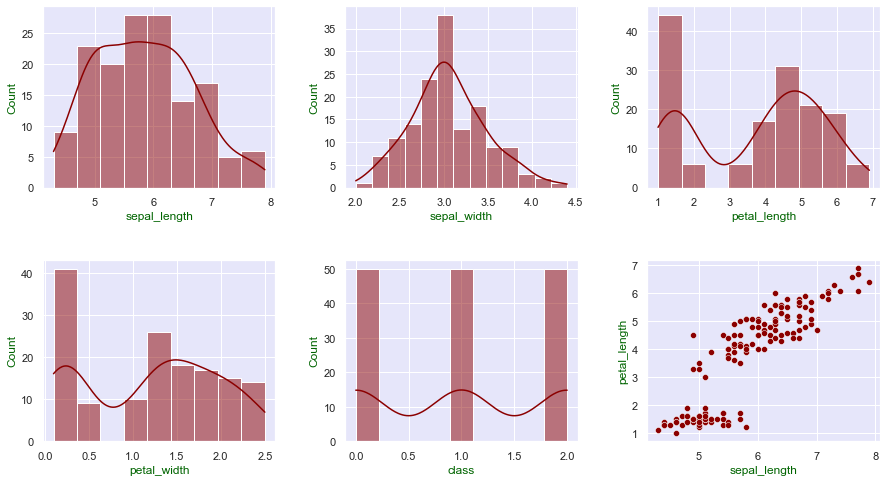

In [12]:
fig, allaxes = plt.subplots(2, 3,figsize=(15,8))
plt.subplots_adjust(hspace= 0.4, wspace= 0.3)
axes= allaxes.ravel()

sns.histplot(Data['sepal_length'], kde=True, ax=axes[0], color=['darkred'])
sns.histplot(Data['sepal_width'], kde=True, ax=axes[1], color=['darkred'])
sns.histplot(Data['petal_length'], kde=True, ax=axes[2], color=['darkred'])
sns.histplot(Data['petal_width'], kde=True, ax=axes[3], color=['darkred'])
sns.histplot(Data['class'], kde=True, ax=axes[4], color=['darkred'])
sns.scatterplot(x='sepal_length',y='petal_length', data=Data, ax=axes[5], color=['darkred'])

plt.show()

<div class="alert alert-success">
<b><u>ShuffleAndSplitData</u></b><br>
ShuffleAndSplitData is a function serving as an poor mans's alternative to sklearn's <i>train_test_split</i> function.<br>
The purpose of the function is to split arrays or matrices into random train and test subsets.<br>
Our function is using only the pandas library<br><br>
<b>ShuffleAndSplitData(</b>Data, ratio<b>)</b><br>
&emsp;<u>Input</u><br>
&emsp;&emsp;<u><i>Data</i></u><br>
&emsp;&emsp;&emsp;Is a DataFrame. It is the data to be shuffle and split.<br>
&emsp;&emsp;<u><i>ratio</i></u><br>
&emsp;&emsp;&emsp;Is a float. It should be between 0.0 and 1.0 and represent the proportion of the dataset to include<br>
&emsp;&emsp;&emsp;in the train split.<br>
&emsp;The function returns two DataFrames corresponding to Train, Test respectively.
</div>

In [13]:
def ShuffleAndSplitData(Data, ratio):
    # Select ratio
    #ratio = 0.75
    Data= Data.sample(frac=1, ignore_index=True)

    total_rows = Data.shape[0]
    train_size = int(total_rows*ratio)

    # Split data into test and train
    Train = Data[0:train_size]
    Test = Data[train_size:]
    Test.index= np.arange(0,len(Test))
    return(Train, Test)

<div class="alert alert-info">
Preparing the data: spliting (train and validation) and decomposing the data into features (XX) and output (YY).
</div>

In [14]:
XX_train, XX_validation= ShuffleAndSplitData(Data, 0.8)
YY_train= XX_train['class']
XX_train= XX_train.drop('class',axis=1)
YY_validation= XX_validation['class']
XX_validation= XX_validation.drop('class',axis=1)
print('Total Number Of Features    :', XX_train.shape[1])
print("Total XX Train samples      :", XX_train.shape[0])
print("Total YY Train samples      :", YY_train.shape[0])
print("Total XX Validation samples :", XX_validation.shape[0])
print("Total YY Validation samples :", YY_validation.shape[0])

Total Number Of Features    : 4
Total XX Train samples      : 120
Total YY Train samples      : 120
Total XX Validation samples : 30
Total YY Validation samples : 30


<div class="alert alert-info">
More Preparations: reset indexing (train and validation) and converting the DataFrame to a multidimensional arrays.<br>
As will be clarified later, we laso have to increase the dimension of the multidimensional arrays by an additional dimension.
</div>

In [15]:
XX_train           = XX_train.reset_index(drop=True)
XXX_train          = XX_train.iloc[:,:].values
XXX_Predict_Test   = XXX_train[0]
XXX_train          = np.expand_dims(XXX_train, axis=1)

YY_train           = YY_train.reset_index(drop=True)
YYY_train_Temp     = YY_train.iloc[:].values
YYY_Predict_Test   = YYY_train_Temp[0]

XX_validation      = XX_validation.reset_index(drop=True)
XXX_validation     = XX_validation.iloc[:,:].values

XXX_validation     = np.expand_dims(XXX_validation, axis=1)
YY_validation      = YY_validation.reset_index(drop=True)
YYY_validation_Temp= YY_validation.iloc[:].values

<div class="alert alert-success">
<b><u>ConvertToCategorical</u></b><br>
ConvertToCategorical is a function serving as an poor mans's alternative to keras's <i>np_utils.to_categorical(y)</i> function.<br>
The purpose of the function is to encode output of a number in range [0,N] into a vector of size N<br>
e.g. supposing ther is 4 posible classes (0,1,2,3) and a supposing a feature output class have the value 2,<br>
the function will convert the value to a vector [0, 0, 1, 0].<br>
Our function is using only the pandas library<br><br>
<b>ConvertToCategorical(</b>Input_Vector, Totral_Categories, Categor_Type<b>)</b><br>
&emsp;<u>Input</u><br>
&emsp;&emsp;<u><i>Data</i></u><br>
&emsp;&emsp;&emsp;Is a DataFrame. It is the data to be shuffle and split.<br>
&emsp;&emsp;<u><i>ratio</i></u><br>
&emsp;&emsp;&emsp;Is a float. It should be between 0.0 and 1.0 and represent the proportion of the dataset to include<br>
&emsp;&emsp;&emsp;in the train split.<br>
&emsp;The function returns two DataFrames corresponding to Train, Test respectively.
</div>

In [16]:
def ConvertToCategorical(Input_Vector, Totral_Categories=None, Categor_Type="float32"):
    Total_Vector_Length= Input_Vector.shape[0]
    if not Totral_Categories:
        Totral_Categories= np.max(Input_Vector)+1
    Output_Categoricals= np.zeros((Total_Vector_Length, Totral_Categories), dtype=Categor_Type)
    Output_Categoricals[np.arange(Total_Vector_Length), Input_Vector]= 1
    return(Output_Categoricals)

<div class="alert alert-info">
Activate ConvertToCategorical function on train and validation data.
</div>

In [17]:
YYY_train     = ConvertToCategorical(YYY_train_Temp)
YYY_validation= ConvertToCategorical(YYY_validation_Temp)

<div class="alert alert-danger">
<b><u>Implementing Neural Network learning algorithm on Iris data.</u></b><br>
ᐅ&emsp;First, Creating Neural Network Object, layers and activation function.<br>
ᐅ&emsp;Second, Setting up loss function.<br>
ᐅ&emsp;Third, Fitting the model.<br>
ᐅ&emsp;Fourth, Predicting<br>
ᐅ&emsp;Fifth, Saving model<br>
ᐅ&emsp;Sixth, Loading model<br>
ᐅ&emsp;Seventh, Printing model<br>
</div>

<div class="alert alert-info">
Showing Neural Network properties.
</div>

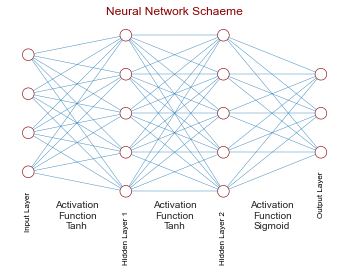

In [18]:
AllNeuralNetwork= DrawNN.NeuralNetworkDisplay( [4,5,5,3], ["Tanh", "Tanh", "Sigmoid"] )
AllNeuralNetwork.Draw()

<div class="alert alert-info">
Creating Neural Network Object, and adding layers properties and activation function to be used
    properties.
</div>

In [19]:
# Network
net = Network()
net.AddLayer(FullyConnectedLayer(4, 5))
net.AddLayer(ActivationFunctionToUse(Tanh, TanhPrime))
net.AddLayer(FullyConnectedLayer(5, 5))
net.AddLayer(ActivationFunctionToUse(Tanh, TanhPrime))
net.AddLayer(FullyConnectedLayer(5, 3))
net.AddLayer(ActivationFunctionToUse(Sigmoid, SigmoidPrime))

<div class="alert alert-info">
Setting up loss function to be used between the actual and the predicted value.
</div>

In [20]:
net.LossFunctionToUse(Mse, MsePrime)

<div class="alert alert-info">
Fitting the model from data sets.
</div>

In [21]:
'''(Results, Validation)= net.Fit(XXX_train, YYY_train, 
                               Epochs=20, Learning_Rate=0.1, 
                               Learning_Rate_Decay= 0.01, Decay_Method= "Common_Decay",
                               Validation_Mode=True,
                               x_validation=XXX_validation, y_validation=YYY_validation,
                               Silent_Mode=False)
(Results, Validation)= net.Fit(XXX_train, YYY_train, 
                               Epochs=20, Learning_Rate=0.1, 
                               Learning_Rate_Decay= 0.95, Decay_Method= "Exponential_Decay",
                               Validation_Mode=True,
                               x_validation=XXX_validation, y_validation=YYY_validation,
                               Silent_Mode=False)'''
(Results, Validation)= net.Fit(XXX_train, YYY_train, 
                               Epochs=20, Learning_Rate=0.1, 
                               Learning_Rate_Decay= 0.0, Decay_Method= "None",
                               Validation_Mode=True,
                               x_validation=XXX_validation, y_validation=YYY_validation,
                               Silent_Mode=False)

epoch   1/ 20   Train Error=0.239466   Val Error= 0.198806   Val Acurancy= 66.666667
epoch   2/ 20   Train Error=0.171854   Val Error= 0.145753   Val Acurancy= 66.666667
epoch   3/ 20   Train Error=0.135625   Val Error= 0.126003   Val Acurancy= 66.666667
epoch   4/ 20   Train Error=0.123669   Val Error= 0.117598   Val Acurancy= 70.000000
epoch   5/ 20   Train Error=0.117930   Val Error= 0.111424   Val Acurancy= 86.666667
epoch   6/ 20   Train Error=0.113979   Val Error= 0.105661   Val Acurancy= 100.000000
epoch   7/ 20   Train Error=0.110748   Val Error= 0.099680   Val Acurancy= 100.000000
epoch   8/ 20   Train Error=0.107677   Val Error= 0.093063   Val Acurancy= 100.000000
epoch   9/ 20   Train Error=0.104357   Val Error= 0.085774   Val Acurancy= 100.000000
epoch  10/ 20   Train Error=0.100728   Val Error= 0.077615   Val Acurancy= 100.000000
epoch  11/ 20   Train Error=0.096878   Val Error= 0.068937   Val Acurancy= 100.000000
epoch  12/ 20   Train Error=0.092936   Val Error= 0.060782 

<div class="alert alert-info">
Showing training loss function as function of epoch, and as option also valodation loss function and acurancy.
</div>

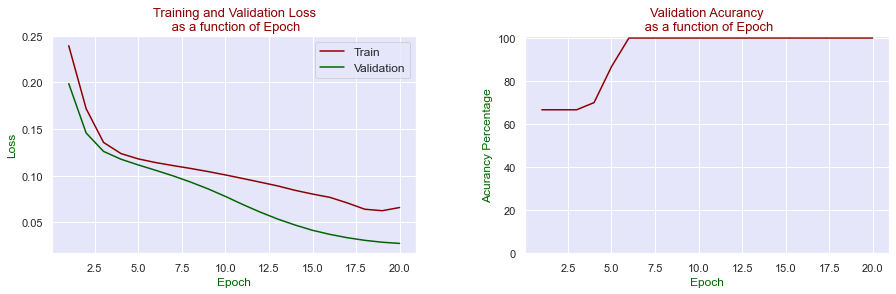

In [22]:
if(Validation==True):
    fig, axes= plt.subplots(ncols=2, nrows=1, figsize=(15,4))
    plt.subplots_adjust(wspace= 0.3)

    sns.lineplot(x=[item[0] for item in Results], y=[item[1] for item in Results], 
                 color="darkred", ax=axes[0])
    sns.lineplot(x=[item[0] for item in Results], y=[item[2] for item in Results], 
                 color="darkgreen", ax=axes[0])
    axes[0].set_title('Training and Validation Loss\n as a function of Epoch', 
                      fontsize=13, color="darkred")
    axes[0].set_ylabel('Loss', fontsize=12, color="darkgreen")
    axes[0].set_xlabel('Epoch', fontsize=12, color="darkgreen")
    axes[0].legend(["Train", "Validation"], loc='upper right', fontsize=12)

    sns.lineplot(x=[item[0] for item in Results], y=[item[3] for item in Results], 
                 color="darkred", ax=axes[1])
    axes[1].set_title('Validation Acurancy\n as a function of Epoch', 
                      fontsize=13, color="darkred")
    axes[1].set_ylabel('Acurancy Percentage', fontsize=12, color="darkgreen")
    axes[1].set_xlabel('Epoch', fontsize=12, color="darkgreen")
    axes[1].set_ylim(0.0, 101.0)
else:
    fig, axes= plt.subplots(figsize=(6,4))
    plt.subplots_adjust(wspace= 0.3)

    sns.lineplot(x=[item[0] for item in Results], y=[item[1] for item in Results], 
                 color="darkred", ax=axes)
    axes.set_title('Training Loss\n as a function of Epoch', 
                   fontsize=13, color="darkred")
    axes.set_ylabel('Loss', fontsize=12, color="darkgreen")
    axes.set_xlabel('Epoch', fontsize=12, color="darkgreen")
    axes.legend(["Train"], loc='upper right', fontsize=12)
plt.show()

<div class="alert alert-info">
Usage of <b>Predict</b> attribute function, with input type data.
</div>

In [23]:
print("XXX_Predict_Test =", XXX_Predict_Test)
print("Type             =", type(XXX_Predict_Test))
print("XXX_Predict_Test =", [[XXX_Predict_Test.tolist()]])
results= net.Predict([[XXX_Predict_Test.tolist()]])
print("Prediction result=", results)
print("Prediction class =", np.argmax(results))
print("YYY_Predict_Test =", YYY_Predict_Test)

XXX_Predict_Test = [5.7 3.8 1.7 0.3]
Type             = <class 'numpy.ndarray'>
XXX_Predict_Test = [[[5.7, 3.8, 1.7, 0.3]]]
Prediction result= [array([[0.91580353, 0.14647219, 0.01963028]])]
Prediction class = 0
YYY_Predict_Test = 0


<div class="alert alert-info">
Usage of <b>Predict</b> attribute function, with input variables.
</div>

In [24]:
Input_1= 5.0
Input_2= 2.3
Input_3= 3.3
Input_4= 1.0
Output = 1

# 1)
Input_Data= np.array((Input_1, Input_2, Input_3, Input_4))
print("Input_Data=", Input_Data)

# 2)
print("\nInput_Data =", [[Input_Data.tolist()]])

# 3)
ResultsOfPrediction= net.Predict([[Input_Data.tolist()]])
print("\nPrediction class =", np.argmax(ResultsOfPrediction))

# 4)
print("\nPrediction class =", np.argmax(ResultsOfPrediction), "   vs   True class =", Output)

Input_Data= [5.  2.3 3.3 1. ]

Input_Data = [[[5.0, 2.3, 3.3, 1.0]]]

Prediction class = 1

Prediction class = 1    vs   True class = 1


<div class="alert alert-info">
Usage of <b>Save</b> attribute function, to save model in a file to local hard disk.
</div>

In [25]:
net.Save("NeuralNetworkData.txt", Silent_Mode=True)

<div class="alert alert-info">
Usage of <b>LoadNeuralNetworkData</b> attribute function, to load a model from saved file.
</div>

In [26]:
net2= LoadNeuralNetworkData("NeuralNetworkData.txt", Silent_Mode=True)

<div class="alert alert-info">
Usage of <b>Fit</b> attribute function, from an import model from saved file.
</div>

In [27]:
Results= net2.Fit(XXX_train, YYY_train, 
                  Epochs=20, Learning_Rate=0.1, 
                  Validation_Mode=True, 
                  x_validation=XXX_validation, y_validation=YYY_validation,
                  Silent_Mode=False)

epoch   1/ 20   Train Error=0.066089   Val Error= 0.026393   Val Acurancy= 100.000000
epoch   2/ 20   Train Error=0.058339   Val Error= 0.024679   Val Acurancy= 100.000000
epoch   3/ 20   Train Error=0.057282   Val Error= 0.023417   Val Acurancy= 100.000000
epoch   4/ 20   Train Error=0.055896   Val Error= 0.022712   Val Acurancy= 100.000000
epoch   5/ 20   Train Error=0.057720   Val Error= 0.022518   Val Acurancy= 100.000000
epoch   6/ 20   Train Error=0.060092   Val Error= 0.022505   Val Acurancy= 100.000000
epoch   7/ 20   Train Error=0.044412   Val Error= 0.019224   Val Acurancy= 100.000000
epoch   8/ 20   Train Error=0.053310   Val Error= 0.018433   Val Acurancy= 100.000000
epoch   9/ 20   Train Error=0.050140   Val Error= 0.017731   Val Acurancy= 100.000000
epoch  10/ 20   Train Error=0.052569   Val Error= 0.019236   Val Acurancy= 96.666667
epoch  11/ 20   Train Error=0.050633   Val Error= 0.016985   Val Acurancy= 100.000000
epoch  12/ 20   Train Error=0.051175   Val Error= 0.016

<div class="alert alert-info">
Usage of <b>PrintLayers</b> attribute function, to prints model properties data.
</div>

In [28]:
net2.PrintLayers()


==== Fully Connected Layer
[[-0.03291036  0.45945874  0.11533636  0.12268266 -1.14192432]]
[[-0.87997125  0.07200762  0.02923332  0.36404599 -1.597934  ]
 [-1.10565311 -0.46460537 -0.92565745  0.24878926 -1.68820466]
 [ 1.50909677  0.4395621   0.9128813   0.09059203  2.57115837]
 [ 1.27867835 -0.14351345  0.34801545 -0.02492597  2.80928177]]
==== Activation Layer
Tanh
TanhPrime

==== Fully Connected Layer
[[-0.01189907  0.21996158 -0.54011672  0.10544141 -0.16418057]]
[[-0.80905207  0.94756621  0.38893114 -0.67853437 -0.31161421]
 [-0.35472556  0.61247773 -0.50806768  0.00970316 -0.0095655 ]
 [-0.35545642  1.75879545 -0.10799849 -0.17898426  0.702791  ]
 [ 0.32857934  0.35471931 -0.77171695  0.6356598  -0.23157843]
 [-0.65023136  0.06830062 -0.14694982 -1.30275985 -0.55112471]]
==== Activation Layer
Tanh
TanhPrime

==== Fully Connected Layer
[[-0.30886184 -1.11103833 -0.44210562]]
[[ 1.50111113  0.65823071 -0.92605442]
 [-2.3092658   2.31914688  0.63801503]
 [ 0.70644166  1.25169626  